In [2]:
import os
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [4]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
path = os.path.join('..', 'data', 'final_cleaned_reviews.csv')
df = pd.read_csv(path)

In [6]:
print("Shape: ", df.shape)
print('=================')
print(df['Sentiment'].value_counts())
print('=================')
print(df.isnull().sum())

Shape:  (393579, 2)
Sentiment
positive    306758
negative     57067
neutral      29754
Name: count, dtype: int64
Clean_Text    1
Sentiment     0
dtype: int64


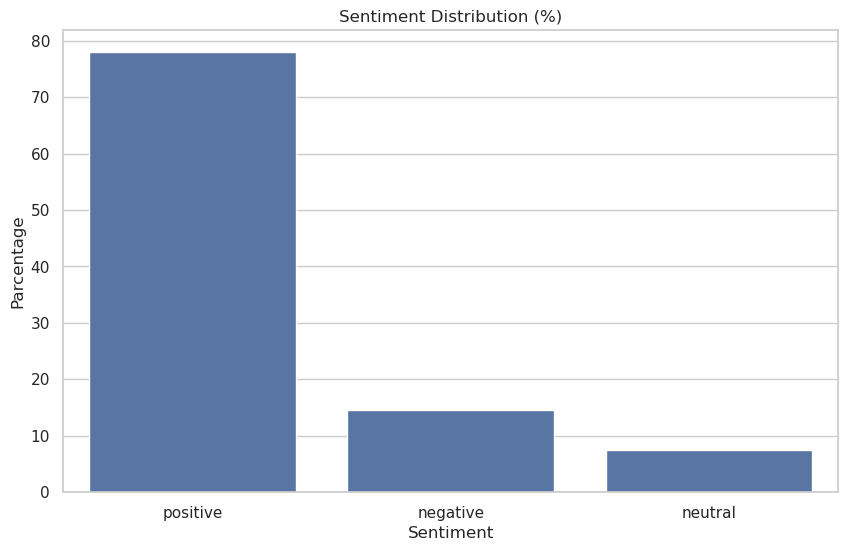

In [8]:
class_dist = df['Sentiment'].value_counts(normalize=True) * 100

sns.barplot(x=class_dist.index, y=class_dist.values)
plt.title("Sentiment Distribution (%)")
plt.ylabel("Parcentage")
plt.xlabel("Sentiment")
plt.show()

In [10]:
df

,Clean_Text,Sentiment
0,bought several vitality canned dog food produc...,positive
1,product arrived labeled jumbo salted peanutsth...,negative
2,confection around century light pillowy citrus...,positive
3,looking secret ingredient robitussin believe f...,negative
4,great taffy great price wide assortment yummy ...,positive
...,...,...
393574,great sesame chickenthis good better resturant...,positive
393575,im disappointed flavor chocolate note especial...,negative
393576,star small give one training session tried tra...,positive
393577,best treat training rewarding dog good groomin...,positive


In [11]:
# add text length
df['Clean_Text'] = df['Clean_Text'].fillna('') 
df["Text_length"] = df['Clean_Text'].apply(lambda x: len(x.split()))

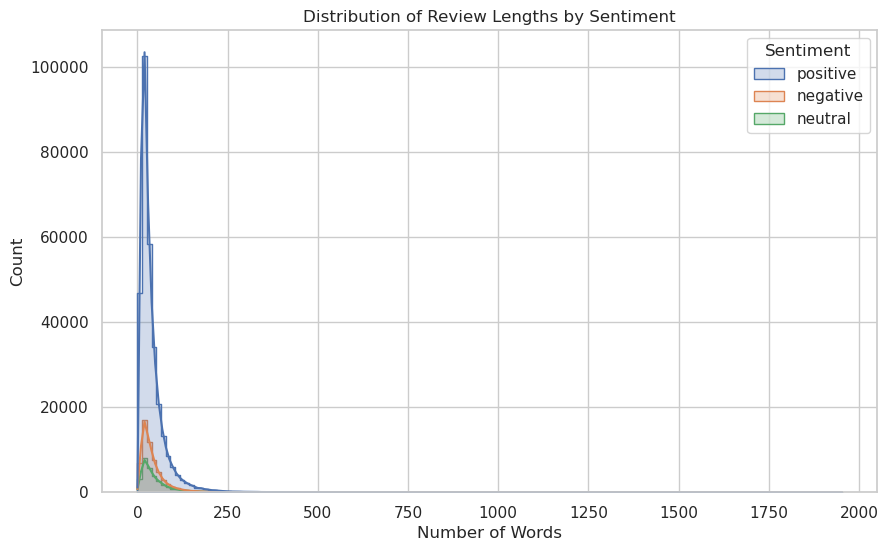

In [16]:
    sns.histplot(data=df, x="Text_length",bins=150, kde=True, hue="Sentiment",element="step")
plt.title("Distribution of Review Lengths by Sentiment")
plt.xlabel("Number of Words")
plt.show()

In [17]:
print(df.groupby("Sentiment")["Text_length"].describe())

              count       mean        std  min   25%   50%   75%     max
Sentiment                                                               
negative    57067.0  42.913751  41.221915  1.0  19.0  31.0  52.0  1111.0
neutral     29754.0  48.522249  46.648823  3.0  20.0  35.0  61.0  1953.0
positive   306758.0  39.298401  39.695150  0.0  17.0  27.0  47.0  1510.0


In [24]:
df["Clean_Text"].dropna(inplace=True)

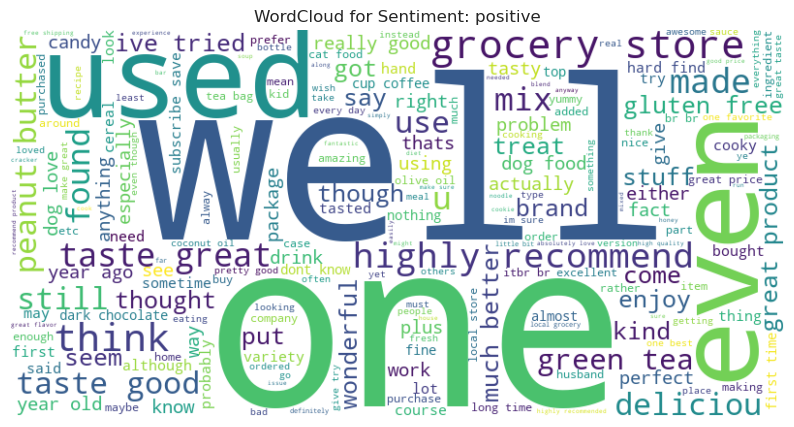

In [29]:
def draw_wordcloud(sentiment_label):
    text = " ".join(df[df["Sentiment"] == sentiment_label]["Clean_Text"])
    wc = WordCloud(width=800, height=400,
                  background_color="white").generate(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f'WordCloud for Sentiment: {sentiment_label}')
    plt.show()

draw_wordcloud('positive')

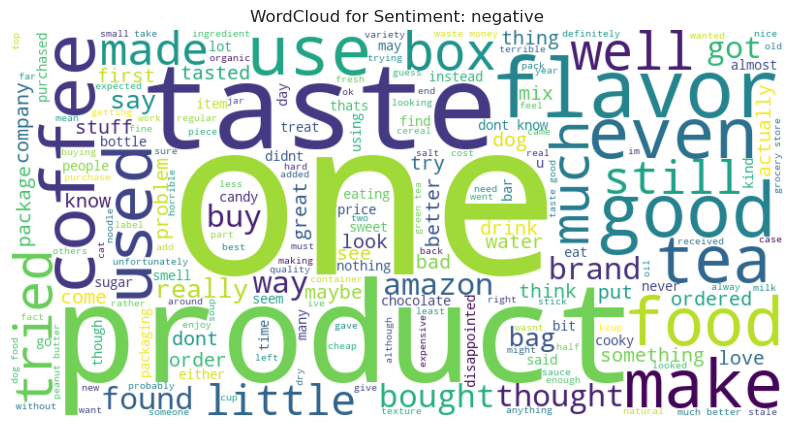

In [30]:
draw_wordcloud('negative')

In [35]:
print("Longest review:\n")
print(df.loc[df['Text_length'].idxmax()]['Clean_Text'])

Longest review:

fuzzy wuzzys summarybr somewhat recommended reservation lukewarm fuzziesbr br positivesbr br expensive compared bottled water although cheap eitherbr br negativesbr br bottled water product labeling product description health claim misleadingbr br first glance liter bottle water reviewing look like another one many variety bottled water market many kind bottled water spring water produced underground formation groundwater naturally flow earth surface artesian water obtained well tap underground aquifer mineral water produced well spring naturally contains trace amount mineral people consider provide health benefit groundwell water produced well tape aquifer sparkling water spring well naturally carbonated purified water produced distillation deionization reverse osmosis purification process essentia drinking water purified water bottle contains municipal water ie tap water come faucet purified using reverse osmosis ultraviolet light disinfectionbr br label essentia wat

In [33]:
print("Shortest review:")
print(df.loc[df['Text_length'].idxmin()]['Clean_Text'])

Shortest review:



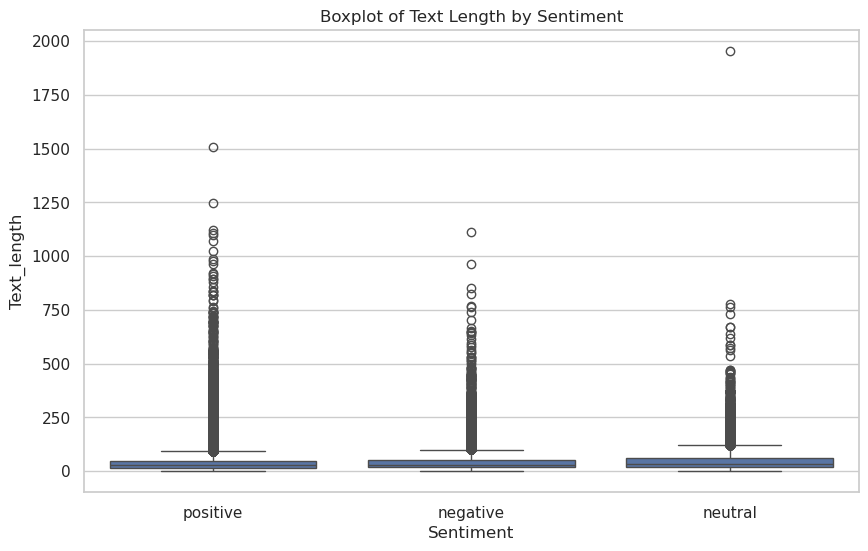

In [37]:
sns.boxplot(x='Sentiment', y='Text_length', data=df)
plt.title("Boxplot of Text Length by Sentiment")
plt.show()